# End-to-end Multil-class Dog Breed Classification

---



This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.0 and TensorFlow Hub

## 1. Problem

Identifying the breed of a dog given an image of a dog.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/overview

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features 

Some information about the data: 
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes)
* There are around 10,000+ images in the training set (these images have labels)
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [21]:
# Unzipping our project data into the google drive so that we can access our data from colab workspace
# !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision"

### Get our workspace ready

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU

In [22]:
# Import TensorFlow 

import tensorflow as tf
print("TensorFlow Version : ", tf.__version__)

TensorFlow Version :  2.2.0


In [23]:
# Import TensorFlow Hub

import tensorflow_hub as hub
print("TensorFlow Hub Version : ", hub.__version__)

TensorFlow Hub Version :  0.8.0


In [24]:
# Check for GPU availability

print("GPU", "available (Yesssss!!!!)" if tf.config.list_physical_devices("GPU") else "not available")

GPU available (Yesssss!!!!)


## Getting our data ready (Turning into tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first (numerical representations.).

Let's start by accessing our data and checking out the labels.

In [25]:
# Check out the labels of our data

import pandas as pd
labels_csv = pd.read_csv("/content/drive/My Drive/Dog Vision/labels.csv")

In [26]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     d82595dca7ce016827454328539a5bb7  scottish_deerhound
freq                                   1                 126

In [27]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [28]:
# How many images are there of each breed?

labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
komondor                 67
golden_retriever         67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

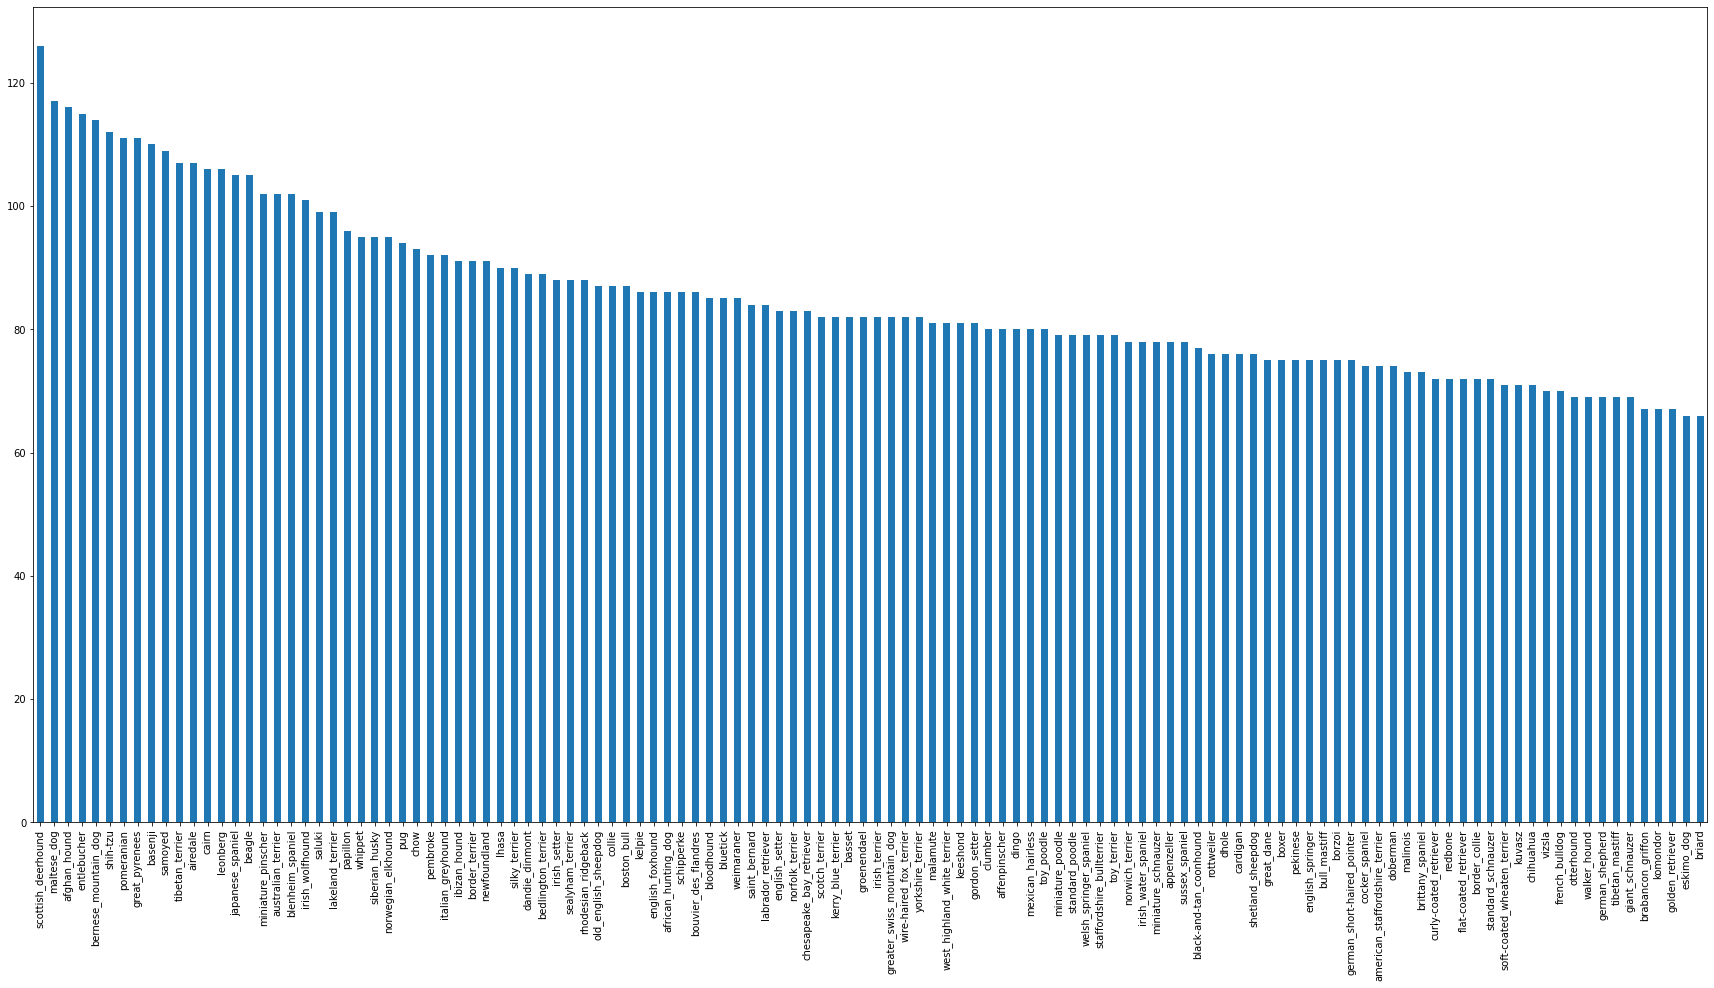

In [29]:
# Now visualize the number of breeds in a plot

labels_csv["breed"].value_counts().plot.bar(figsize=(30,15))

In [30]:
# Mean value of the breed column

labels_csv["breed"].value_counts().mean()

85.18333333333334

In [31]:
# Median value of the breed column

labels_csv["breed"].value_counts().median()

82.0

## Preparing the Images

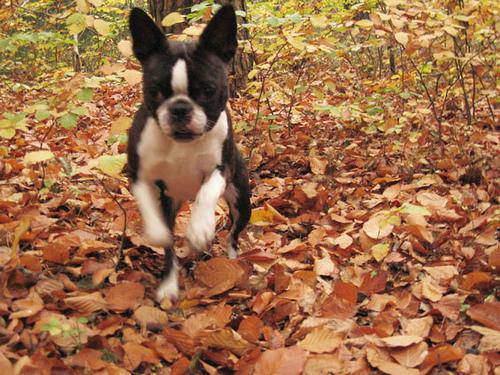

In [32]:
# Let's view an image

from IPython.display import Image
Image("drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels

Let's get a list of all of our image file pathnames.

In [33]:
# create a pathnames from image ID's

filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

In [34]:
# Check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [35]:
# Check whether the number of filenames matches of actual image file 

import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
    print("Filenames match actual amount of files!!!! Proceed")

else:
    print("Filenames doe not match actual amount of files, check the target directory.")

Filenames match actual amount of files!!!! Proceed


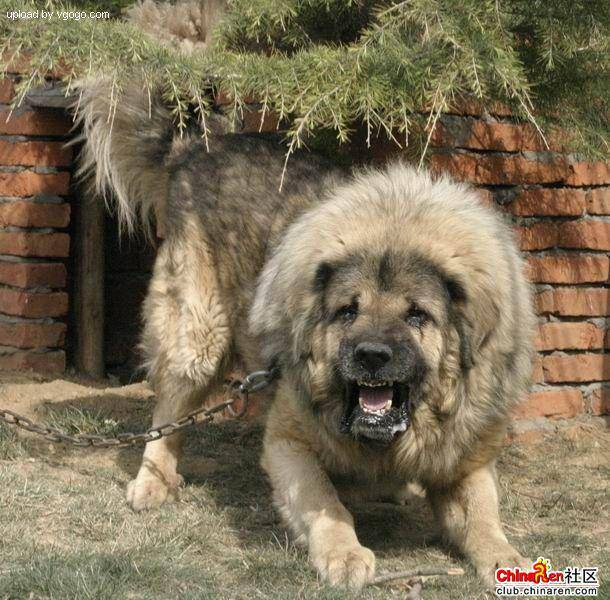

In [36]:
# View an image from filenames
Image(filenames[9000])

In [37]:
# Show the name of  the same dog breed

labels_csv["breed"][9000]

'tibetan_mastiff'

## Turning data labels into numbers

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [38]:
import numpy as np

labels = labels_csv["breed"]

labels = np.array(labels)

In [39]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [40]:
# See if number of labels matches the number of filepaths

if len(labels) == len(filenames):
    print("Number of labels matches number of filenames.")

else:
    print("number of labels does not match number of files, chech data directory.")

Number of labels matches number of filenames.


In [41]:
# Find the unique label values

unique_breeds = np.unique(labels)

In [42]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [43]:
len(unique_breeds)

120

In [44]:
# Train a single label into an array of booleans

print(labels[0])

labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [45]:
# Turn every label into a boolean array

boolean_labels = [label == unique_breeds for label in labels]

In [46]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [47]:
len(boolean_labels)

10222

In [48]:
# Example: Turning boolean array into integers

print(labels[0])  # Original label
print(np.where(unique_breeds == labels[0]))  # index where label occurs

print(boolean_labels[0].argmax())  # index where label occurs in boolean array

print(boolean_labels[0].astype(int))  # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [49]:
# same task for index 2
print(labels[2])  # Original label
print(np.where(unique_breeds == labels[2]))  # index where label occurs

print(boolean_labels[2].argmax())  # index where label occurs in boolean array

print(boolean_labels[2].astype(int))  # there will be a 1 where the sample label occurs

pekinese
(array([85]),)
85
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

Since the data set from kaggle doesn't come with a validation set, we're going to create our own:

In [50]:
# Setup X & y variables

X = filenames
y = boolean_labels

Now, we are going to start off experimanting with ~1000 images and increase as need

In [51]:
# Set number of images to use for experimanting

NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [52]:
# Let's split our data into train and validation sets

from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                   y[:NUM_IMAGES],
                                                   test_size=0.2,
                                                   random_state=42)

In [53]:
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [54]:
X_train[:5]

['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [55]:
y_train[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

## Preprocess image (Turning images into Tensors):

To preprocess our images into Tensors, we're going to write a function which does a few things:

1. Take an image filepath as an input
2. Use Tensorflow to read the file and save it to a variable 'image'
3. Turn our 'image' (a jpg) into Tensors.
4. Normalize our image(convert color chanel values from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 224)
6. Return the modified 'image'.

Before we do, let's see what importing an image look like

In [56]:
# Convert image to NumPy array

from matplotlib.pyplot import imread

image = imread(filenames[42])

In [57]:
image.shape

(257, 350, 3)

In [58]:
image.max(), image.min()

(255, 0)

In [59]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [60]:
# turning an image into Tensors

tf.convert_to_tensor(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.

In [61]:
#Define image size

IMG_SIZE = 224

# Create a function for preprocessing images

def process_image(image_path, img_size=IMG_SIZE):

    """
    Takes an image file path and turns the image into a Tensors.
    """

    # Read in an image file
    image = tf.io.read_file(image_path)

    #Turn the jpeg image into numerical Tensor with 3 colour chanels (Red, Greed, Blue)
    image = tf.image.decode_jpeg(image, channels=3)

    # Convert the colour channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize the image to our desired value (224, 224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

## Turning our data into bathces

Why turn our data into batches?

Let's say you're trying to process 10,000+ images in one go, they all might not fit into memory. So, that's why we do about 32(this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples, which look like this (image, label)

In [62]:
# Create a simple function to return a tuple (image, label)

def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label.
    Process the image and returns a tuple of (image. label).
    """

    image = process_image(image_path)

    return image, label

In [63]:
# Demo of the above

get_image_label(X[42], tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to  turn our data into tuples of Tensors in the form: (image, label).

Let's make a function to turn all of our data (X & y) into batches.

In [64]:
# Define the batch size, 32 is a good start

BATCH_SIZE = 32

# Create a function to turn data into batches

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image(X) and label(y) pairs.
    Shuffle the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels)
    """

    # If the data is a test dataset, we probably doesn't have labels
    if test_data:
        print("Creating test data batches.........")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # Only file paths, no labels

        data_batch = data.map(process_image).batch(BATCH_SIZE)

        return data_batch

    
    # If the data is a valid datasets, we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches........")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # File paths
                                                   tf.constant(y))) # labels

        data_batch = data.map(get_image_label).batch(BATCH_SIZE)

        return data_batch


    else:
        print("Creating training data batches.......")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        
        # Shuffling pathnames and labels before mapping image preprocessor function is faster than shuffle

        data = data.shuffle(buffer_size=len(X))

        # Create (image, label) tuples (this also turns the image  path into a preprocessed image)

        data = data.map(get_image_label)

        # Turn the training data into batches 
        data_batch = data.batch(BATCH_SIZE)

        return data_batch



In [65]:
# Create Training and Validation data batches
train_data = create_data_batches(X_train, y_train)

val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches.......
Creating validation data batches........


In [66]:
# Check out the different attribute of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualize Data Batches

Our data is now in batches, however, these can be a little hard to udetstand/comprehend, let's visualize them.

In [67]:
import matplotlib.pyplot as plt

In [68]:
# Create a function for viewing images in data batches

def show_25_images(images, labels):
    """
    Display a plot of 25images and their labels from a data batch.
    """

    # Setup the figure
    plt.figure(figsize=(10,10))

    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        #Create subplots (5 rows, 5columns)
        ax = plt.subplot(5, 5, i+1)

        #Display an image
        plt.imshow(images[i])

        #Add the image label as the title 
        plt.title(unique_breeds[labels[i].argmax()])

        # Turn the grid lines off
        plt.axis("off")

In [69]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

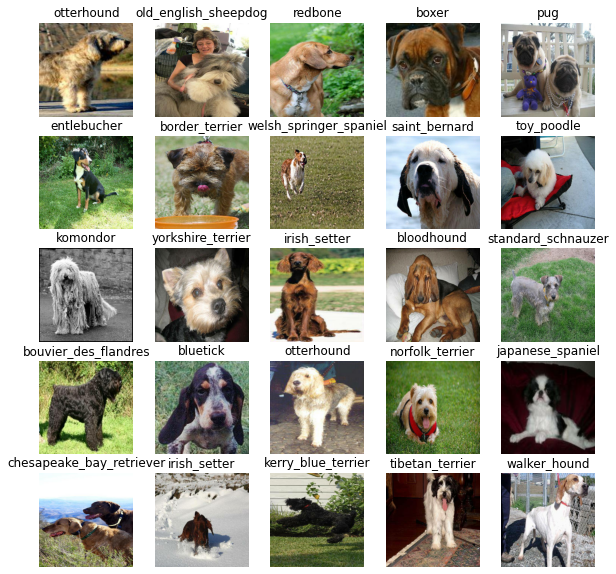

In [70]:
# Now let's visualize the data in a training batch

train_images, train_labels = next(train_data.as_numpy_iterator())

show_25_images(train_images, train_labels)

## Preparing our inputs and outputs

Before we build a model, there are a few things we need to define:

* The input shape(our images shape, in the form of Tensors) to our model.

* The output shape(image labels, in the form of tensors) of our model.

* The URL of the model we want to use

In [71]:
# Setup input shape to the model
INPUT_SHAPE = [None, 224, 224, 3] #Batch, height, width, channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from Tensorflow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

## Building a deep learning model:

Now we've got out input shapes, output shapes and model ready to go. Let's put them together into a keras deep learning model.

Knowing this, let's create a function which: 
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a keras model in Sequential Fashion(do this first, then this, then that)
* Compiles the model (Saya it should be evaluated and improved)
* Builds the model (Tells the model the input shape it'll be getting)
* Returns the model.

In [72]:
# Create a function which builds Keras model

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with: ", MODEL_URL)

    # Setup the model layers
    model = tf.keras.Sequential([
                                 hub.KerasLayer(MODEL_URL), # layer 1 (input layer)
                                 tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax") # Layer 2 (output layer)
    ])

    # Compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )

    # Build the model
    model.build(INPUT_SHAPE)

    return model

In [73]:
model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Evaluating our model

### Creating callbacks
Callback are helper functions, a model can use during to do such things as save its progress, check its process or stop training early if a model stops improving.

We'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

### TensorBoard callback

To setup a TensorBoard callback, we need to do 3 things,
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our models `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training)

In [75]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [76]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    #create a log directory for storing TensorBoard logs
    log_dir = os.path.join("drive/My Drive/Dog Vision/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

    return tf.keras.callbacks.TensorBoard(log_dir)

### Preventing Overfitting

Early stopping helps our model from overfitting by stopping training if a certain metric stops callbacks

In [77]:
# Create early stopping callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience = 3)

## Training our Deep Learning Model

### Training a model (on subset of data)

Our first model is going to train on 1000 images, to make sure everything is  working.

In [78]:
NUM_EPOCHS = 100 #@param {type:"slider", nin:10, max:100, step:10}

In [79]:
# Check to make sure we're still running a GPU
print("GPU", " available (YES!!!!!)" if tf.config.list_physical_devices("GPU") else " not available")

GPU  available (YES!!!!!)


#### Let's create a function which trains a model

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the call backs we'd like to use.
* Return the model

In [80]:
# Build a function to train and return a trained model

def train_model():
    """
    Trains a given model and returns the trained version.
    """

    # Create a model
    model = create_model()

    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created 
    model.fit(x = train_data,
              epochs = NUM_EPOCHS,
              validation_data = val_data,
              validation_freq = 1,
              callbacks = [tensorboard, early_stopping])
    
    return model

In [81]:
# Fit the model to the data
model = train_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 665s 27s/step - loss: 4.5934 - accuracy: 0.0913 - val_loss: 3.5221 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 6s 257ms/step - loss: 1.6509 - accuracy: 0.6787 - val_loss: 2.2428 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 6s 254ms/step - loss: 0.5772 - accuracy: 0.9325 - val_loss: 1.7386 - val_accuracy: 0.6050
Epoch 4/100
25/25 [==============================] - 6s 255ms/step - loss: 0.2591 - accuracy: 0.9837 - val_loss: 1.5558 - val_accuracy: 0.6150
Epoch 5/100
25/25 [==============================] - 6s 254ms/step - loss: 0.1512 - accuracy: 0.9962 - val_loss: 1.4644 - val_accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 6s 255ms/step - loss: 0.1021 - accuracy: 1.0000 - val_loss: 1.4256 - val_accuracy: 0.6550
Epoch 7/100
25/25 [=============================

### Evaluating Performance with TensorBoard

Checking the TensorBoard logs.
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contens.

In [82]:
%tensorboard --logdir drive/My\ Drive/Dog\ Vision/logs

Output hidden; open in https://colab.research.google.com to view.

## Make and evaluating predictions using a trained model

In [83]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1)

7/7 [==============================] - 1s 161ms/step


In [84]:
predictions

array([[6.3164113e-04, 1.3807604e-04, 1.7948758e-03, ..., 1.0645753e-04,
        4.1264643e-06, 6.4322832e-03],
       [5.3716055e-04, 1.2109833e-04, 5.3175571e-03, ..., 3.1776834e-04,
        1.1144091e-03, 5.4869302e-05],
       [3.8416297e-06, 4.4483666e-05, 9.9122735e-06, ..., 1.3496820e-05,
        3.4112996e-05, 6.6488894e-05],
       ...,
       [1.0481936e-06, 8.9995247e-06, 1.5181451e-05, ..., 8.1087774e-07,
        1.0641877e-04, 3.0888954e-05],
       [1.9057184e-03, 3.8818526e-04, 3.4601708e-05, ..., 7.6293065e-05,
        5.7919384e-05, 4.4702031e-03],
       [2.5394361e-04, 2.1881037e-06, 3.9568748e-03, ..., 5.9516365e-03,
        9.1836519e-05, 7.8946818e-05]], dtype=float32)

In [85]:
predictions.shape

(200, 120)

In [86]:
len(y_val)

200

In [87]:
len(unique_breeds)

120

In [88]:
len(predictions[0])

120

In [89]:
predictions[0]

array([6.31641131e-04, 1.38076037e-04, 1.79487583e-03, 1.79220078e-04,
       1.15782605e-04, 3.71099995e-05, 2.98927110e-02, 5.95756574e-04,
       4.03563696e-04, 6.26621695e-05, 2.14749467e-04, 1.39296011e-04,
       5.43082017e-04, 4.34567992e-05, 6.80229045e-04, 1.84733217e-04,
       4.26941871e-04, 3.30839723e-01, 7.89424485e-06, 2.91777105e-05,
       4.08834749e-04, 2.13671039e-04, 7.45557600e-06, 4.72058635e-03,
       2.97899587e-05, 1.24550104e-04, 2.18038246e-01, 2.65393846e-05,
       1.37392024e-03, 7.16107083e-04, 1.32369198e-04, 1.26685703e-03,
       9.04513698e-04, 1.63528748e-05, 9.65642976e-05, 1.23377284e-02,
       9.79269244e-05, 3.85605032e-04, 2.15757216e-04, 1.39943673e-04,
       3.70522728e-03, 2.58828277e-05, 1.80287883e-04, 2.58140382e-04,
       4.01693342e-06, 3.78746598e-04, 7.54729917e-05, 1.17471405e-04,
       5.00402937e-04, 1.23258986e-04, 3.15359473e-04, 2.06612385e-04,
       4.77517169e-04, 2.22919844e-04, 4.14230526e-05, 8.70865006e-06,
      

In [90]:
np.sum(predictions[0])

1.0

In [91]:
np.sum(predictions[1])

1.0

In [92]:
# First predictions 
index = 0
print(predictions[index])
print(f"Max value (Probability of predictions): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index : {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[6.31641131e-04 1.38076037e-04 1.79487583e-03 1.79220078e-04
 1.15782605e-04 3.71099995e-05 2.98927110e-02 5.95756574e-04
 4.03563696e-04 6.26621695e-05 2.14749467e-04 1.39296011e-04
 5.43082017e-04 4.34567992e-05 6.80229045e-04 1.84733217e-04
 4.26941871e-04 3.30839723e-01 7.89424485e-06 2.91777105e-05
 4.08834749e-04 2.13671039e-04 7.45557600e-06 4.72058635e-03
 2.97899587e-05 1.24550104e-04 2.18038246e-01 2.65393846e-05
 1.37392024e-03 7.16107083e-04 1.32369198e-04 1.26685703e-03
 9.04513698e-04 1.63528748e-05 9.65642976e-05 1.23377284e-02
 9.79269244e-05 3.85605032e-04 2.15757216e-04 1.39943673e-04
 3.70522728e-03 2.58828277e-05 1.80287883e-04 2.58140382e-04
 4.01693342e-06 3.78746598e-04 7.54729917e-05 1.17471405e-04
 5.00402937e-04 1.23258986e-04 3.15359473e-04 2.06612385e-04
 4.77517169e-04 2.22919844e-04 4.14230526e-05 8.70865006e-06
 1.32432135e-04 2.07124837e-03 1.05930500e-04 3.43674533e-02
 7.47607846e-05 2.70626479e-05 1.34588999e-03 4.28748826e-05
 7.23208359e-05 8.997249

## Transform predictions to text
Having the above functionality is great but we want to be able to do it at scale.

And it would be even better if we could see the image prediction is being made on.

Note: Prediction probabilities are also know as confidance levels.

In [93]:
# Turn prediction probalities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """

    return unique_breeds[np.argmax(prediction_probabilities)]


In [94]:
# Get a prediction label based on an array of prediction probabilities

pred_label = get_pred_label(predictions[81])

In [95]:
pred_label

'dingo'

Now, since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images, and then compare those predictions to the validation labels (truth labels)

In [96]:
# Create a function to unbatch a batch dataset

def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns seperate array of images and labels.
    """

    images = []
    labels = []

    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])

    return images, labels

In [97]:
# Unbatchinfy the validation data
val_images, val_labels = unbatchify(val_data)

In [98]:
val_images[0]

array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

In [99]:
val_labels[0]

'cairn'

### Visualize Model Predictions

Now, we've got ways to get:
    1. prediction labels
    2. Validation labels (Truth labels)
    3. Validation images 

Let's make some function to make these all a bit more visualize.

We'll create a function which:
    1. Takes an array of prediction probabilities, an array of truth labels and an array of images and integers.
    2. Convert the prediction probabilities to a predicted label
    3. Plot the predicted label, its predicted probability, the truth label and the target image on a single plot.

In [100]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, groud truth and image for sample on n
    """

    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
    
    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # plot images & remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])


    # change the color of the title depending on if the prediction is right or wrong

    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Change plot title to be predicted, probability of prediction and truth label

    plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)

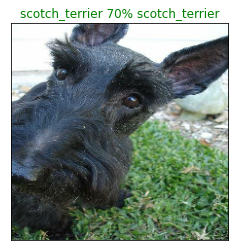

In [101]:
plot_pred(prediction_probabilities=predictions, 
          labels=val_labels,
          images= val_images)

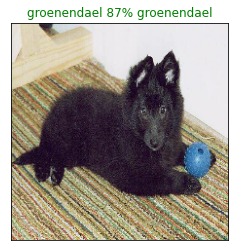

In [102]:
plot_pred(prediction_probabilities=predictions, 
          labels=val_labels,
          images= val_images,
          n=77)

Now, we've got one function to visualize our models top prediction, let's make another function to view our models top 10 predictions.

This function will:
    * Take an input of prediction probabilities array and a ground truth array and an integer.
    * Find the prediction using get_pred_label()
    * Find the top 10:
        1. Prediction probabilites indexes
        2. Prediction probabilities values 
        3. Prediction labels
    * Plot top 10 predictions probability values and labels, coloring the text label green

In [103]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
    """
    Plus the top 10 highest prediction confidences along with the truth label for sample n.
    """

    pred_prob, true_label = prediction_probabilities[n], labels[n]

    # Get the predicted label
    pred_label = get_pred_label(pred_prob)

    # Find the top 10 probabilities confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]


    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]

    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]

    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                       top_10_pred_values,
                       color="gray")
    plt.xticks(np.arange(len(top_10_pred_labels)),
               labels = top_10_pred_labels,
               rotation = "vertical")
    
    # Change color of true label
    if np.isin(true_label, top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

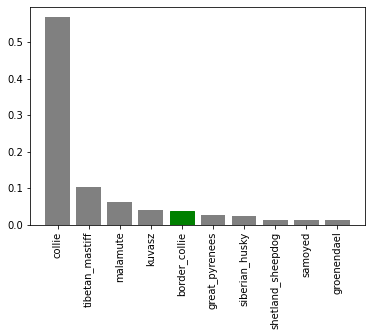

In [104]:
plot_pred_conf(prediction_probabilities=predictions, labels=val_labels, n=9)

Now, we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few

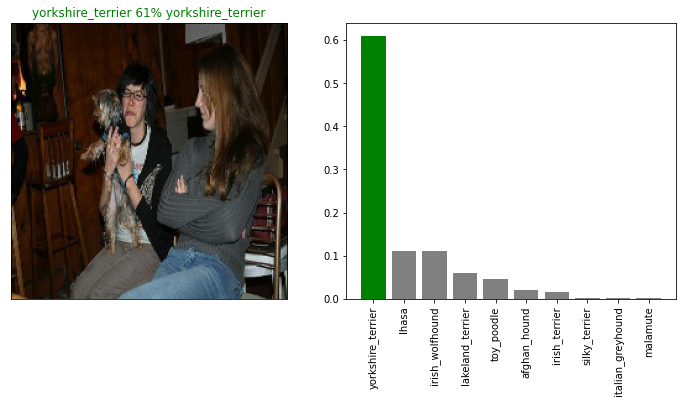

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


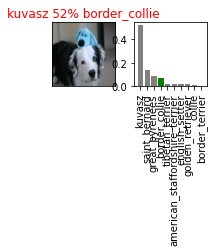

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


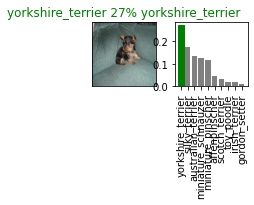

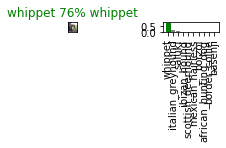

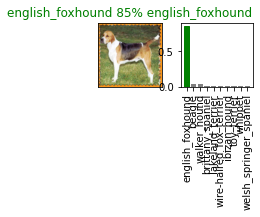

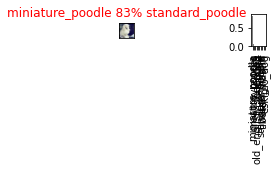

In [105]:
# Let's check out a few predictions and their different values
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities=predictions,
              labels = val_labels,
              images = val_images,
              n=i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_pred_conf(prediction_probabilities=predictions,
                   labels=val_labels,
                   n=i+i_multiplier)
    plt.tight_layout(h_pad=1.0)
    plt.show()

### Saving and loading a trained model


In [106]:
# Create a function to save a model

def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (string)
    """
    # Create a model directory pathname with current time

    modeldir = os.path.join("drive/My Drive/Dog Vision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))

    model_path = modeldir + "-" + suffix + ".h5" #Save format of model

    print(f"Saving model to : {model_path}.......")

    model.save(model_path)

    return model_path
    

In [111]:
# Create a function to load a trained model

def load_model(model_path):
    """
    Loads a saved model from a specific path
    """

    print(f"Loading saved model: { model_path}")

    model = tf.keras.models.load_model(model_path,
                                       custom_objects ={"KerasLayer": hub.KerasLayer})
    
    return model

Now we've got functions to save and load a trained model, let's make sure they work:

In [112]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam") 

Saving model to : drive/My Drive/Dog Vision/models/20200728-15181595949504-1000-images-mobilenetv2-Adam.h5.......


'drive/My Drive/Dog Vision/models/20200728-15181595949504-1000-images-mobilenetv2-Adam.h5'

In [113]:
# Load a trained model

loaded_1000_image_model = load_model("drive/My Drive/Dog Vision/models/20200728-15181595949504-1000-images-mobilenetv2-Adam.h5")

Loading saved model: drive/My Drive/Dog Vision/models/20200728-15181595949504-1000-images-mobilenetv2-Adam.h5


In [114]:
# Evaluate the pre-saved-model
model.evaluate(val_data)

7/7 [==============================] - 1s 145ms/step - loss: 1.2597 - accuracy: 0.7000


[1.2596714496612549, 0.699999988079071]

In [115]:
# Evaluate the laoded model
loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 1s 157ms/step - loss: 1.2597 - accuracy: 0.7000


[1.2596714496612549, 0.699999988079071]

### Training Model on Full Data set

In [116]:
len(X)

10222

In [117]:
len(y)

10222

In [120]:
# Create a data batch with the full data set
full_data = create_data_batches(X, y)

Creating training data batches.......


In [121]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [122]:
# Create a model for full data
full_model = create_model()

Building model with:  https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [123]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

In [124]:
# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience = 3)

Note: Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're unsing in the runtime has to load all of the images into memory

In [125]:
# Fit the full model to the full data

full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 6588s 21s/step - loss: 1.3393 - accuracy: 0.6689
Epoch 2/100
320/320 [==============================] - 66s 205ms/step - loss: 0.4049 - accuracy: 0.8819
Epoch 3/100
320/320 [==============================] - 66s 207ms/step - loss: 0.2361 - accuracy: 0.9361
Epoch 4/100
320/320 [==============================] - 67s 208ms/step - loss: 0.1531 - accuracy: 0.9656
Epoch 5/100
320/320 [==============================] - 66s 207ms/step - loss: 0.1058 - accuracy: 0.9797
Epoch 6/100
320/320 [==============================] - 66s 205ms/step - loss: 0.0768 - accuracy: 0.9872
Epoch 7/100
320/320 [==============================] - 65s 202ms/step - loss: 0.0589 - accuracy: 0.9905
Epoch 8/100
320/320 [==============================] - 67s 208ms/step - loss: 0.0467 - accuracy: 0.9950
Epoch 9/100
320/320 [==============================] - 66s 208ms/step - loss: 0.0379 - accuracy: 0.9959
Epoch 10/100
320/320 [==============================] - 65s 203m

In [126]:
# Save the full model
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

Saving model to : drive/My Drive/Dog Vision/models/20200728-17411595958067-full-image-set-mobilenetv2-Adam.h5.......


'drive/My Drive/Dog Vision/models/20200728-17411595958067-full-image-set-mobilenetv2-Adam.h5'

In [132]:
# Load in the full model
loaded_full_model = load_model("/content/drive/My Drive/Dog Vision/models/20200728-17411595958067-full-image-set-mobilenetv2-Adam.h5")

Loading saved model: /content/drive/My Drive/Dog Vision/models/20200728-17411595958067-full-image-set-mobilenetv2-Adam.h5


### Making predictions on the test dataset
Since our model has been trained on images in the form of Tensors batches, to make predictions on the test data, we'll have to get it into the format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensors batches . To make predictions on the Test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to True (Since the test data doen't have labels)
* Make a predictions array by passing the test batches to the predict() method called on our model.

In [138]:
# Load test image filenames 
test_path = "drive/My Drive/Dog Vision/test/"

test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]
len(test_filenames)

10357

In [139]:
# Create test data batches 
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches.........


In [140]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

Note: Calling the `predict()` on our full model and passing it the test data batch will take a long time to run

In [141]:
# Make predictions on the test data batch using the loaded full model

test_predictions = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 6530s 20s/step


In [142]:
# Save predictions (Numpy array ) to CSV file (for access later)

np.savetxt("drive/My Drive/Dog Vision/preds_array.csv", test_predictions, delimiter=",")

In [143]:
# Load predictions (Numpy array) from CSV file
test_predictions = np.loadtxt("drive/My Drive/Dog Vision/preds_array.csv", delimiter=",")

test_predictions[:10]
test_predictions.shape

(10357, 120)

### Preparing test dataset predictions for kaggle 

Looking at the kaggle sample submission, we find that it wants our models predictions probability outputs in a DataFrame with an ID and a column for each different dog breed. To get the data in this format, we'll:

* Create a pandas DataFrame with an ID column as well as a column for each Dog breed.
* Add data to the ID column by extracting the text image ID's from their filepath.
* Add data (the prediction prrobabilities) to each of the dog breed columns
* Export the DataFrame as a CSV to submit it to kaggle.

In [144]:
# Create a pandas DataFrame with empty column

preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

preds_df

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [145]:
# Append the text image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]

preds_df["id"] = test_ids

preds_df.head()

id  ... yorkshire_terrier
0  f50cf15ef4c06e63d9483b48d7bead6b  ...               NaN
1  e8eca3dc497d4bb15b0254bc9f56cdd7  ...               NaN
2  eddf1be0c12c7f3a5029a7787e89476f  ...               NaN
3  f53c0a1ab2af3549a2ef5825d023b160  ...               NaN
4  ed3d8126013933f566dc4113efe7c0bc  ...               NaN

[5 rows x 121 columns]

In [146]:
# Add to the prediction probabilities to each dog breed column

preds_df[list(unique_breeds)] = test_predictions

preds_df.head()

id  ... yorkshire_terrier
0  f50cf15ef4c06e63d9483b48d7bead6b  ...       3.46155e-11
1  e8eca3dc497d4bb15b0254bc9f56cdd7  ...       2.35006e-08
2  eddf1be0c12c7f3a5029a7787e89476f  ...        7.7744e-05
3  f53c0a1ab2af3549a2ef5825d023b160  ...       4.11036e-13
4  ed3d8126013933f566dc4113efe7c0bc  ...       1.89598e-12

[5 rows x 121 columns]

In [147]:
# Save our predictions DataFrame to CSV for submission to kaggle

preds_df.to_csv("drive/My Drive/Dog Vision/full_model_predictions_submission_1_mobilenetv2.csv", index=False)

### Making Predictions on our images

To make predictions on custom images, we'll:

* Get the filepath of our own images 
* Turn the filepaths into data batches using `create_data_batches()` and since our custom images won't have labels, so we set the test_data parameters to True
*  Pass the custom image data batches to our models predict method
* Convert the predictions probabilities to predictions labels
* Compare the predicted labels to the custom images

In [148]:
# Get custom image filepath
custom_path = "drive/My Drive/Dog Vision/my-dog-photos/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]

custom_image_paths

['drive/My Drive/Dog Vision/my-dog-photos/dog1.jpg',
 'drive/My Drive/Dog Vision/my-dog-photos/dog3.jpg',
 'drive/My Drive/Dog Vision/my-dog-photos/dog2.jpg']

In [149]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data=True)
custom_data

Creating test data batches.........


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [150]:
# Make predictions on the custom data

custom_preds = loaded_full_model.predict(custom_data)

custom_preds.shape

(3, 120)

In [159]:
# Get custom image prediction labels 
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['pug', 'doberman', 'dingo']

In [160]:
# Get custom images (our unbatchify() function won't work since there aren't labels...... maybe we would fix this later)

custom_images = []

In [161]:
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(image)

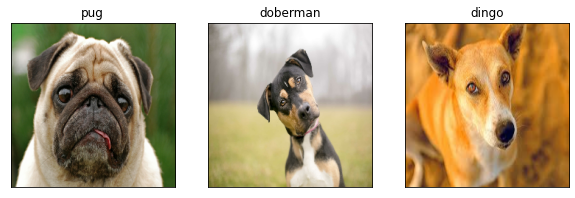

In [162]:
# Check custom image predictions 
plt.figure(figsize=(10,10))

for i, image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(image)